# Guided Project: Finding Heavy Traffic Indicators on I-94

### Introduction
This guided project aims to analyze a dataset containing information about westbound traffic on the I-94 Interstate highway. The goal of the analysis is to identify indicators of heavy traffic on I-94, such as weather conditions, time of the day, and time of the week. By exploring the dataset and visualizing the data, we aim to uncover patterns and insights that can help us understand the factors contributing to heavy traffic on the highway.

### Goal
The primary goal of this project is to identify indicators of heavy traffic on the I-94 Interstate highway. By analyzing the dataset and applying data visualization techniques, we aim to answer questions such as:

1. How does traffic volume vary by time of the day, day of the week, and month?
2. Are there specific weather conditions that are associated with heavier traffic?
3. How does traffic volume change throughout the year?

By answering these questions, we can gain insights into the factors that contribute to heavy traffic on the I-94 highway. This information can be valuable for transportation planning, traffic management, and understanding the impact of different factors on traffic volume.

Let's start by reading in the dataset and examining the first and last five rows to get an initial understanding of the data.

In [37]:
import pandas as pd

# Read the dataset
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# Display the first five rows
print(data.head())

# Display the last five rows
print(data.tail())

# Get more information about the dataset
data.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

When we use Matplotlib inside Jupyter, we also need to add the %matplotlib inline magic — this enables Jupyter to generate the graphs.

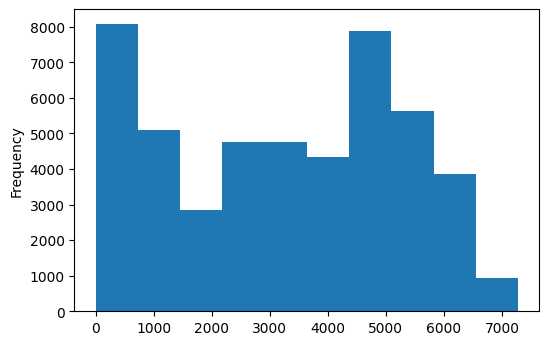

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

data.traffic_volume.plot.hist()
plt.show()

In [39]:
data.traffic_volume.describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

We analyzed the distribution of traffic_volume and found the following:

* About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
* About 75% of the time, the traffic volume was four times as much (4,933 cars or more).

We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [40]:
data.date_time = pd.to_datetime(data.date_time)

# Isolate daytime data (7 AM to 7 PM)
daytime_data = data[(data['date_time'].dt.hour >= 7) & (data['date_time'].dt.hour < 19)]

# Isolate nighttime data (7 PM to 7 AM)
nighttime_data = data[(data['date_time'].dt.hour >= 19) | (data['date_time'].dt.hour < 7)]


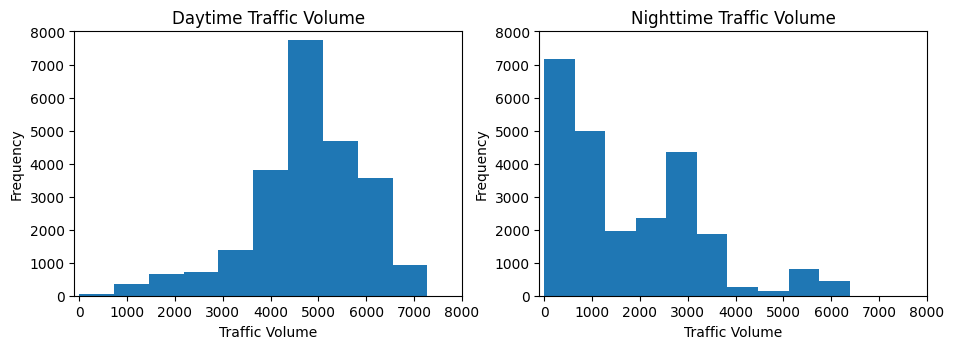

In [41]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
daytime_data.traffic_volume.plot.hist()
plt.title('Daytime Traffic Volume')
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim(-100, 8000)
plt.ylim(0, 8000)

plt.subplot(1, 2, 2)
nighttime_data.traffic_volume.plot.hist()
plt.title('Nighttime Traffic Volume')
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim(-100, 8000)
plt.ylim(0, 8000)

plt.show()

We can determine that the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we will only focus on the daytime data moving forward.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

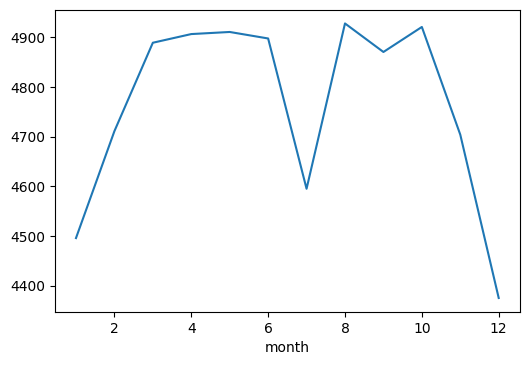

In [42]:
daytime_data = daytime_data.copy()
daytime_data['month'] = daytime_data['date_time'].dt.month
by_month = daytime_data.groupby('month').mean()
by_month['traffic_volume']

by_month['traffic_volume'].plot.line()
plt.show()

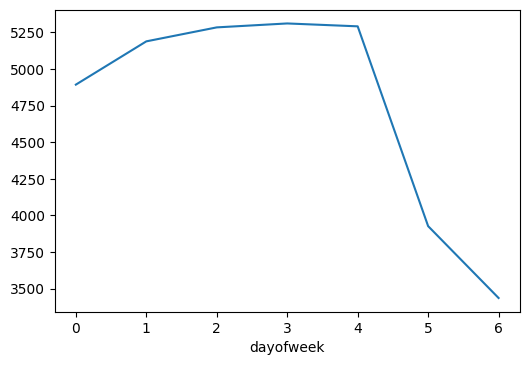

In [45]:
daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek
by_dayofweek = daytime_data.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'] 

by_dayofweek['traffic_volume'].plot.line()
plt.show()

We found that the traffic volume is significantly heavier on business days compared to the weekends.

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [46]:
daytime_data['hour'] = daytime_data['date_time'].dt.hour
bussiness_days = daytime_data.copy()[daytime_data['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_data.copy()[daytime_data['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


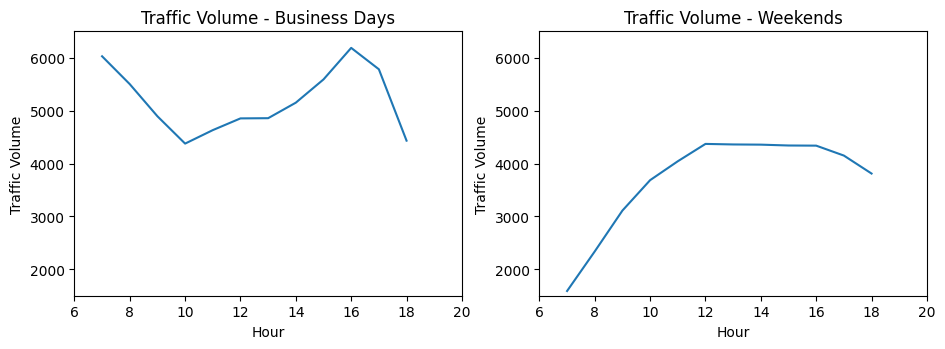

In [49]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Traffic Volume - Business Days')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.xlim(6,20)
plt.ylim(1500,6500)

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic Volume - Weekends')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.xlim(6,20)
plt.ylim(1500,6500)

plt.show()

So far, we've focused on finding time indicators for heavy traffic, and we reached the following conclusions:

* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

In [50]:
daytime_data.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

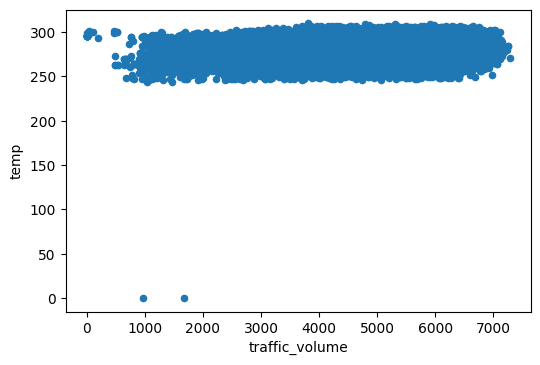

In [52]:
daytime_data.plot.scatter('traffic_volume', 'temp')
plt.show()

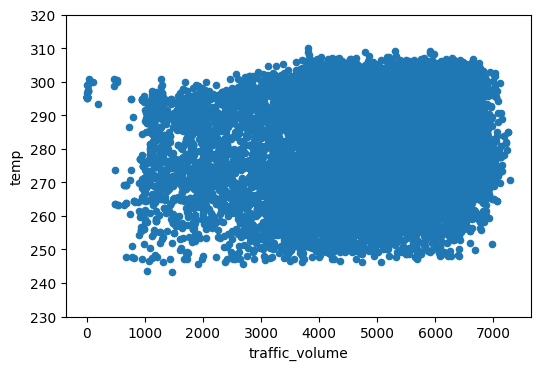

In [53]:
daytime_data.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

We examined the correlation between traffic_volume and the numerical weather columns. However, we didn't find any reliable indicator of heavy traffic.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: `weather_main` and `weather_description`.

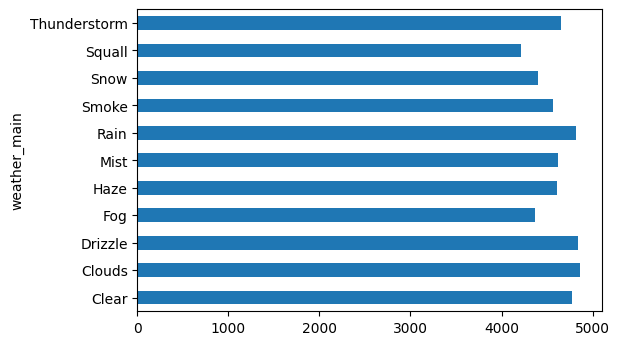

In [56]:
by_weather_main = daytime_data.groupby('weather_main').mean()
by_weather_description = daytime_data.groupby('weather_description').mean()

by_weather_main['traffic_volume'].plot.barh()
plt.show()

In [ ]:
by_weather_description['traffic_volume'].plot.barh()
plt.show()